In [14]:
# Importación de librerías

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# Carga de datos
df = pd.read_csv('./data/dynamic_pricing.csv')
# Mostrar solo columnas numéricas
df.describe()


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [19]:
# Seleccionar las 6 variables numéricas relevantes
features_updated = [
    'Number_of_Riders',
    'Number_of_Drivers',
    'Number_of_Past_Rides',
    'Average_Ratings',
    'Expected_Ride_Duration',
    'Historical_Cost_of_Ride'
]

# Filtrar y escalar
X_updated = df[features_updated].dropna()
scaler = StandardScaler()
X_scaled_updated = scaler.fit_transform(X_updated)

# Aplicar PCA
pca_updated = PCA()
X_pca_updated = pca_updated.fit_transform(X_scaled_updated)

# Varianza explicada y acumulada
explained_variance_updated = pca_updated.explained_variance_ratio_
cumulative_variance_updated = np.cumsum(explained_variance_updated)

# Crear DataFrame para mostrar
variance_df_updated = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(len(explained_variance_updated))],
    'Varianza Explicada': explained_variance_updated,
    'Varianza Acumulada': cumulative_variance_updated
})

variance_df_updated

,Componente Principal,Varianza Explicada,Varianza Acumulada
0,PC1,0.321726,0.321726
1,PC2,0.272131,0.593857
2,PC3,0.177127,0.770984
3,PC4,0.155075,0.926059
4,PC5,0.062046,0.988105
5,PC6,0.011895,1.000000


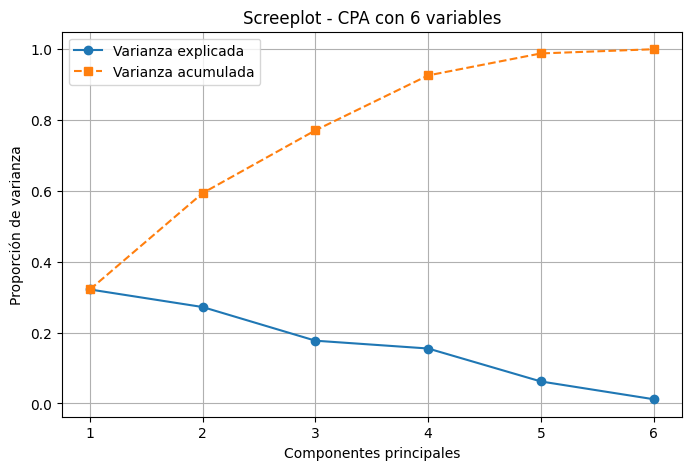

In [17]:
# Mostrar Screeplot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_updated)+1), explained_variance_updated, marker='o', label='Varianza explicada')
plt.plot(range(1, len(explained_variance_updated)+1), cumulative_variance_updated, marker='s', linestyle='--', label='Varianza acumulada')
plt.title('Screeplot - CPA con 6 variables')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza')
plt.xticks(range(1, len(explained_variance_updated)+1))
plt.legend()
plt.grid(True)
plt.show()


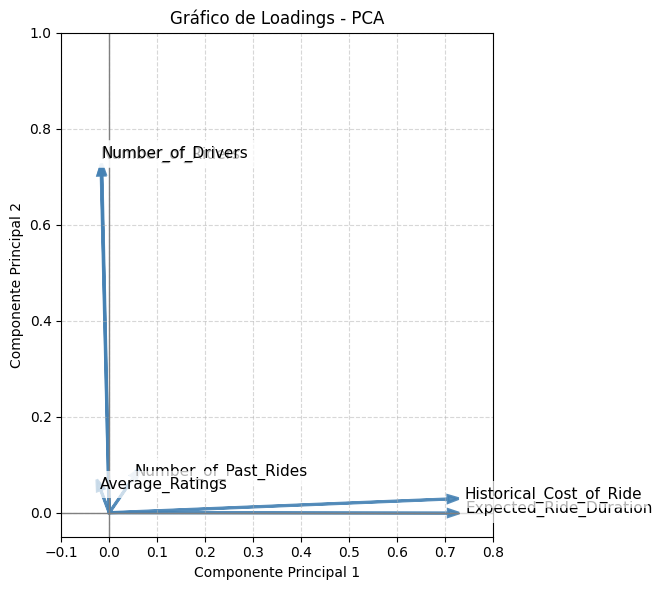

In [26]:
loadings = pca_updated.components_.T[:, :2]

plt.figure(figsize=(8, 6))
for i, var in enumerate(features_updated):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='steelblue', alpha=0.9, head_width=0.015, linewidth=2)
    plt.text(loadings[i, 0]*1.05, loadings[i, 1]*1.05, var, fontsize=11,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Loadings - PCA')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlim(-0.1, 0.8)
plt.ylim(-0.05, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

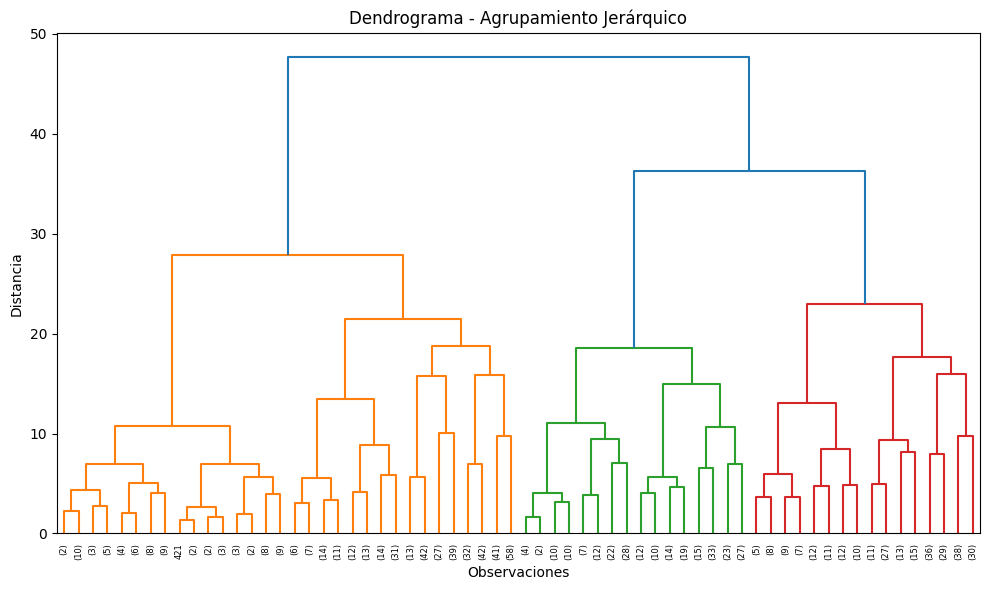

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Seleccionar variables numéricas
features_updated = [
    "Number_of_Riders",
    "Number_of_Drivers",
    "Number_of_Past_Rides",
    "Average_Ratings",
    "Expected_Ride_Duration",
    "Historical_Cost_of_Ride",
]

# Estandarización y PCA
X = df[features_updated].dropna()
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=5).fit_transform(X_scaled)

# Agrupamiento jerárquico
linked = linkage(X_pca, method="ward")

# Generar y guardar dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Dendrograma - Agrupamiento Jerárquico")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

X = df[features_updated].dropna()
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=5).fit_transform(X_scaled)

# Realizar clustering jerárquico
linked = linkage(X_pca, method='ward')

# Cortar el dendrograma en 3 clústeres
clusters = fcluster(linked, t=3, criterion='maxclust')

# Calcular frecuencias absolutas y relativas
cluster_counts = pd.Series(clusters).value_counts().sort_index()
cluster_percents = (cluster_counts / cluster_counts.sum() * 100).round(2)

# Tabla resumen
cluster_freq_df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Frecuencia': cluster_counts.values,
    'Porcentaje (%)': cluster_percents.values
})

cluster_freq_df


,Cluster,Frecuencia,Porcentaje (%)
0,1,479,47.9
1,2,248,24.8
2,3,273,27.3


In [36]:
X_original = df[features_updated].dropna().copy()
X_original["Cluster"] = clusters

summary_stats = X_original.groupby("Cluster").agg(["mean", "std"]).round(2)

summary_stats.columns = [f"{var}_{stat}" for var, stat in summary_stats.columns]

summary_stats

,Number_of_Riders_mean,Number_of_Riders_std,Number_of_Drivers_mean,Number_of_Drivers_std,Number_of_Past_Rides_mean,Number_of_Past_Rides_std,Average_Ratings_mean,Average_Ratings_std,Expected_Ride_Duration_mean,Expected_Ride_Duration_std,Historical_Cost_of_Ride_mean,Historical_Cost_of_Ride_std
Cluster,,,,,,,,,,,,
1,57.29,22.20,24.03,17.63,51.52,28.94,4.28,0.40,61.45,34.04,229.01,113.86
2,42.70,16.45,16.74,9.46,45.83,28.57,4.38,0.44,143.65,23.59,534.04,113.12
3,81.83,13.71,41.82,19.39,51.23,30.35,4.11,0.46,126.48,35.77,477.52,152.08
